Nama : Brian Cindya Richmahayu
NIM : 4101422095

**1. Eksplorasi Awal**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
sns.set()

In [47]:
df=pd.read_csv('Titanic-Dataset.csv')

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


a) Berapa jumlah total penumpang dalam data?

In [50]:
total_penumpang = len(df)
print(f"Total penumpang: {total_penumpang}")

Total penumpang: 891


b) Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik

In [51]:
selamat_counts = df['Survived'].value_counts()
print("\nJumlah penumpang selamat dan tidak selamat:")
print(selamat_counts)



Jumlah penumpang selamat dan tidak selamat:
Survived
0    549
1    342
Name: count, dtype: int64


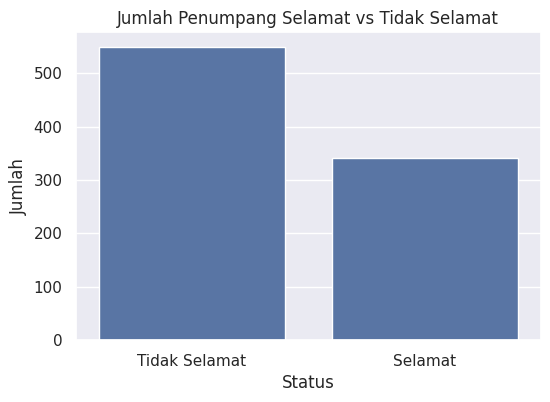

In [52]:
# Visualisasi
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title('Jumlah Penumpang Selamat vs Tidak Selamat')
plt.xticks([0,1], ['Tidak Selamat', 'Selamat'])
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

c) Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua?

In [53]:
rata2_umur = df['Age'].mean()
penumpang_termuda = df[df['Age'] == df['Age'].min()]
penumpang_tertua = df[df['Age'] == df['Age'].max()]

print(f"\nRata-rata umur penumpang: {rata2_umur:.2f} tahun")
print("\nPenumpang termuda:")
print(penumpang_termuda)
print("\nPenumpang tertua:")
print(penumpang_tertua)


Rata-rata umur penumpang: 29.70 tahun

Penumpang termuda:
     PassengerId  Survived  Pclass                             Name   Sex  \
803          804         1       3  Thomas, Master. Assad Alexander  male   

      Age  SibSp  Parch Ticket    Fare Cabin Embarked  
803  0.42      0      1   2625  8.5167   NaN        C  

Penumpang tertua:
     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex   Age  SibSp  Parch Ticket  Fare Cabin Embarked  
630  male  80.0      0      0  27042  30.0   A23        S  


d) Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan

In [54]:
gender_counts = df['Sex'].value_counts()
print("\nJumlah penumpang berdasarkan jenis kelamin:")
print(gender_counts)


Jumlah penumpang berdasarkan jenis kelamin:
Sex
male      577
female    314
Name: count, dtype: int64


Jumlah penumpang wanita = 314 dan pria = 577, yang lebih banyak yaitu pria (male).

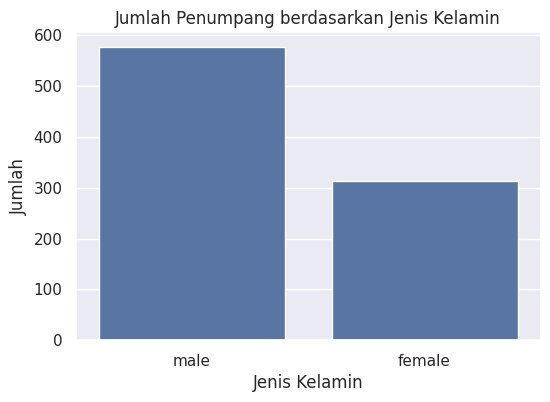

In [55]:
# Visualisasi
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df)
plt.title('Jumlah Penumpang berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

e) Tampilkan jumlah penumpang berdasarkan kelas (Pclass) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan

In [56]:
# Jumlah penumpang berdasarkan kelas (Pclass)
kelas_counts = df['Pclass'].value_counts()
print("\nJumlah penumpang berdasarkan kelas:")
print(kelas_counts)


Jumlah penumpang berdasarkan kelas:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [57]:
# Persentase yang berada di kelas 1
persen_kelas1 = (kelas_counts[1] / total_penumpang) * 100
print(f"\nPersentase penumpang di kelas 1: {persen_kelas1:.2f}%")



Persentase penumpang di kelas 1: 24.24%


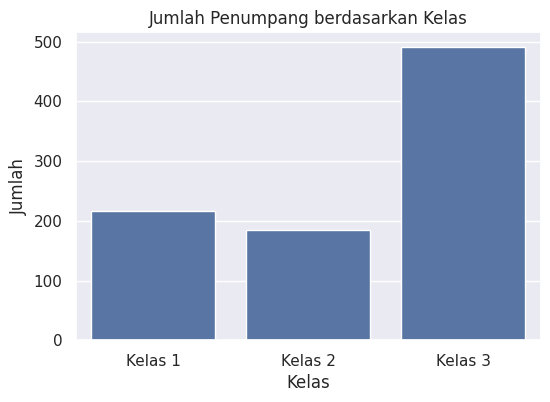

In [58]:
# Visualisasi
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', data=df)
plt.title('Jumlah Penumpang berdasarkan Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks([0,1,2], ['Kelas 1', 'Kelas 2', 'Kelas 3'])
plt.show()

**2. Preprocessing**

In [59]:
# Cek missing value
print("Cek missing value:")
print(df.isnull().sum())

Cek missing value:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


a)Apakah terdapat missing value pada data tersebut?

In [61]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [62]:
np.sum(df.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Berdasarkan output summarize tersebut, diperoleh bahwa kolom yang mengandung Missing Values (blanks/ N/A (Python : nan atau NaN)) adalah kolom Age, Cabin, dan Embarked.

In [63]:
#mengetahui jumlah missing value di seluruh dataset
df.isnull().sum().sum()

np.int64(866)

b) Jika ya, apa yang Anda lakukan?

Kolom Age (numerik):
Karena umur penting dan tidak boleh dihapus banyak, isi missing value dengan median karena lebih tahan terhadap outlier dibanding mean.

In [64]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-64-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [65]:
#jumlah missing value
np.sum(df['Age'].isnull())

np.int64(0)

Kolom Embarked (kategori, pelabuhan):
Karena Embarked berupa teks (misalnya 'S', 'C', 'Q'), isi missing value dengan modus (nilai yang paling sering muncul).

In [66]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-66-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [67]:
#jumlah missing value
np.sum(df['Embarked'].isnull())

np.int64(0)

Kolom Cabin (banyak kosong):
Karena jumlah kosong di Cabin terlalu banyak (lebih dari 70% data kosong), maka lebih baik hapus kolom Cabin sekalian supaya tidak mengganggu model nanti.

In [68]:
df.drop(columns='Cabin', inplace=True)

In [69]:
np.sum(df.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


c) Apakah terdapat outlier pada data tersebut? Jelaskan apa itu outlier!

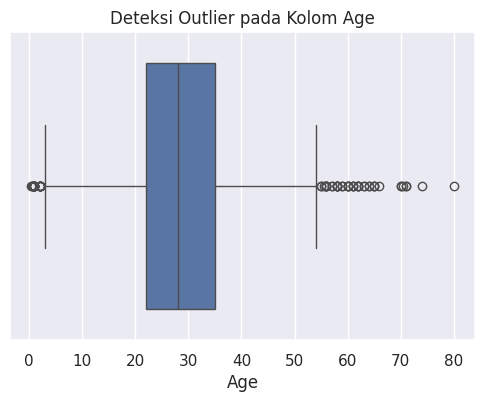

In [71]:
# Misalnya cek outlier di kolom 'Age' dengan boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title('Deteksi Outlier pada Kolom Age')
plt.show()

Outlier adalah data yang secara ekstrem berbeda dari data lainnya. Misalkan umur > 80 tahun dianggap outlier di data Titanic.

d) Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?

Outlier pada Titanic kadang penting (contoh: ada penumpang usia 80+ itu valid) Kalau perlu diatasi: bisa dihapus atau winsorizing (potong nilai ekstrem)

In [72]:
# Contoh hapus outlier ekstrem:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr
df_cleaned = df[(df['Age'] >= batas_bawah) & (df['Age'] <= batas_atas)]

In [73]:
print("\nJumlah data setelah menghapus outlier:", len(df_cleaned))


Jumlah data setelah menghapus outlier: 825


e) Jika dibutuhkan silakan lakukan transformasi/standarisasi/scalling terhadap data tersebut

In [74]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

**3. Modelling**

a) Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.

Data training adalah bagian dari dataset yang digunakan untuk melatih model dalam pembelajaran mesin. Data ini digunakan untuk melatih model, yaitu membuat model belajar dari pola-pola yang ada di data.

Data testing (atau data uji) merupakan bagian dari dataset yang digunakan untuk menguji kinerja model yang telah dilatih dengan data training. Digunakan untuk menguji performa model yang sudah dilatih, dengan data yang belum pernah dilihat oleh model sebelumnya.

Perlu membagi menjadi data training dan testing karena untuk melatih model pada sebagian data (training set), lalu menguji performa model pada data baru (testing set). Ini penting untuk menghindari overfitting (model terlalu hafal data latihan, tapi jelek di data baru).



b) Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?

Data training sebesar 80% training, Data testing sebesar 20% atau 70% data training, 30% data testing.

Memilih membagi proporsi tersebut karena cukup banyak data untuk melatih model, tapi juga cukup banyak data untuk validasi performa model.

In [75]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [76]:
numeric = ['Survived','Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df_train = df[numeric]
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c) Buatlah model klasifikasi dari 3 algoritma yang berbeda. Jelaskan masing-masing model dan cara kerjanya

**NAIVE BAYES**

Naive Bayes adalah algoritma klasifikasi berbasis teori probabilitas Bayes dengan asumsi bahwa setiap fitur bersifat independen satu sama lain.
Cara Kerjanya:

*   Menghitung probabilitas dari setiap kelas berdasarkan fitur yang ada.
*   Untuk sebuah data baru, menghitung peluang bahwa data tersebut termasuk dalam masing-masing kelas.
*   Memilih kelas dengan probabilitas tertinggi sebagai prediksi.





In [84]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [88]:
acc = accuracy_score(y_pred_nb,y_test)
print(acc)

0.770949720670391


In [89]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       105
           1       0.73      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [90]:
print(X.columns)
print(X.dtypes)

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object


**KNN**

 KNN adalah algoritma instance-based learning yang mengklasifikasikan data baru berdasarkan kemiripan (jarak) dengan data yang sudah ada.
 Cara kerjanya:
*   Menghitung jarak (biasanya Euclidean distance) antara data baru dengan seluruh data latih.
*  Menentukan k tetangga terdekat (misal k=5).
* Mayoritas kelas dari tetangga-tetangga tersebut menjadi kelas prediksi.



In [87]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [91]:
acc = accuracy_score(y_pred_knn,y_test)
print(acc)

0.7094972067039106


In [92]:
print(classification_report(y_test,y_pred_knn))


              precision    recall  f1-score   support

           0       0.72      0.84      0.77       105
           1       0.70      0.53      0.60        74

    accuracy                           0.71       179
   macro avg       0.71      0.68      0.69       179
weighted avg       0.71      0.71      0.70       179



**Decision Tree**

Decision Tree adalah algoritma yang menggunakan struktur pohon untuk membuat keputusan berdasarkan serangkaian pertanyaan (berdasarkan fitur).
Cara kerjanya:
* Memilih fitur yang memisahkan data paling baik menggunakan metrik seperti Gini Impurity atau Entropy (dalam ID3, C4.5, atau CART).
* Membagi dataset menjadi cabang berdasarkan fitur tersebut.
* Proses ini berulang hingga mencapai daun pohon yang berisi kelas akhir.


In [81]:
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_decision = decision.predict(X_test)

In [82]:
acc = accuracy_score(y_pred_decision,y_test)
print(acc)

0.7597765363128491


In [83]:
print(classification_report(y_test,y_pred_decision))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       105
           1       0.72      0.69      0.70        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



d) Berapa nilai evaluasi dari masing-masing model pada data uji? Apa arti metrik evaluasi tersebut?

Naive Bayes

In [94]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       105
           1       0.73      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



K-Nearest Neighbor (KNN)

In [95]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77       105
           1       0.70      0.53      0.60        74

    accuracy                           0.71       179
   macro avg       0.71      0.68      0.69       179
weighted avg       0.71      0.71      0.70       179



Decision Tree

In [96]:
print(classification_report(y_test,y_pred_decision))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       105
           1       0.72      0.69      0.70        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



Arti Metrik Evalusi
*   Accuracy:
Seberapa banyak prediksi yang benar dibandingkan total data.
*  Precision:
Dari semua yang model prediksi sebagai "Survived" (positif), berapa banyak yang benar-benar "Survived".
*   Recall:
Dari semua penumpang yang sebenarnya "Survived", berapa banyak yang berhasil kita deteksi dengan benar.
*   F1-Score:
Gabungan dari precision dan recall (harmonic mean).




e) Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Berikan ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi dataset Anda dengan baik.

Berdasarkan nilai evaluasi, Naive Bayes memiliki nilai akurasi, precision, recall, dan F1-score tinggi  dibandingkan Decision Tree dan KNN. Jadi, Naive Bayes merupakan algoritma yang paling bagus.

Ulasan yang menyebabkan metode Naive Bayes dapat memprediksi dataset dengan baik , yaitu:

*   Naive Bayes mengasumsikan fitur-fitur saling independen dan berdistribusi
normal.
*   Di dataset Titanic, beberapa fitur kunci (seperti "Sex", "Pclass", "Embarked") cukup sederhana dan terpisah jelas, sehingga asumsi independensinya cukup terpenuhi.

*   Titanic termasuk dataset relatif kecil.
*   Naive Bayes biasanya sangat efisien dan optimal di dataset kecil-menengah.

**4. Evaluasi**

a) Berdasarkan classification report model terbaik, berapa nilai precision dan recall untuk prediksi penumpang yang "selamat"?

In [97]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       105
           1       0.73      0.72      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



Nilai precision untuk penumpang yang "selamat" adalah 0,73 dan nilai recall untuk penumpang yang "selamat" adalah 0,72.

b) Berapa banyak penumpang yang diprediksi selamat, dan berapa diantaranya benar-benar selamat?

In [99]:
from sklearn.metrics import confusion_matrix

#y_test = label asli, y_pred_nb = prediksi model Naive Bayes
cm = confusion_matrix(y_test, y_pred_nb)

TP = cm[1,1]
FP = cm[0,1]

jumlah_diprediksi_selamat = TP + FP
jumlah_benar_selamat = TP

print("Diprediksi selamat:", jumlah_diprediksi_selamat)
print("Benar-benar selamat:", jumlah_benar_selamat)


Diprediksi selamat: 73
Benar-benar selamat: 53


Diprediksi selamat sebanyak 73 penumpang dan benar-benar selamat sebanyak 53 penumpang.